In [1]:
pip install pandas matplotlib seaborn yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.1 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138892 sha256=13aa63f46bf6bd00a0ff0f4537fc97e150811e867d7282f59d2d2df2b608ea1e
  Stored in directory: /Users/srivastavachahak/Library/Caches/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need t

In [2]:
import yfinance as yf

# Define the stock symbol and time period
stock_symbol = 'AAPL'  # Example: Apple Inc.
stock_data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

# Display the first few rows of the data
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167618  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200


In [3]:
# Checking for missing data
print(stock_data.isnull().sum())

# Filling or dropping missing data if necessary
stock_data = stock_data.dropna()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# Daily returns
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Moving averages (e.g., 20-day, 50-day)
stock_data['20-Day MA'] = stock_data['Adj Close'].rolling(window=20).mean()
stock_data['50-Day MA'] = stock_data['Adj Close'].rolling(window=50).mean()

# Volatility (standard deviation of returns)
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=20).std()


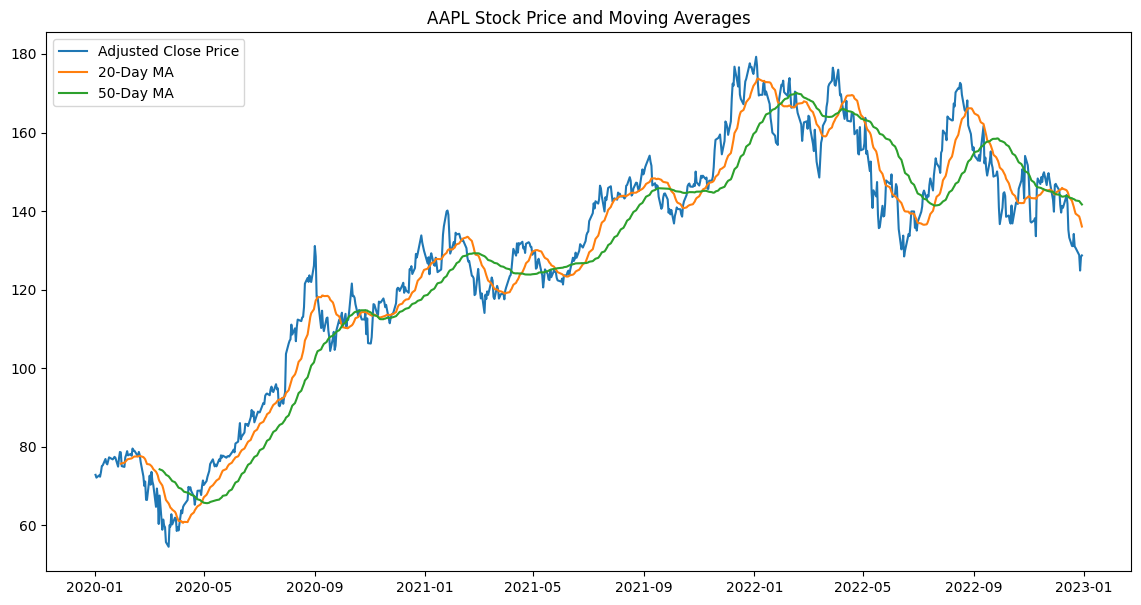

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Adjusted Close Price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Adj Close'], label='Adjusted Close Price')
plt.plot(stock_data['20-Day MA'], label='20-Day MA')
plt.plot(stock_data['50-Day MA'], label='50-Day MA')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.legend()
plt.show()


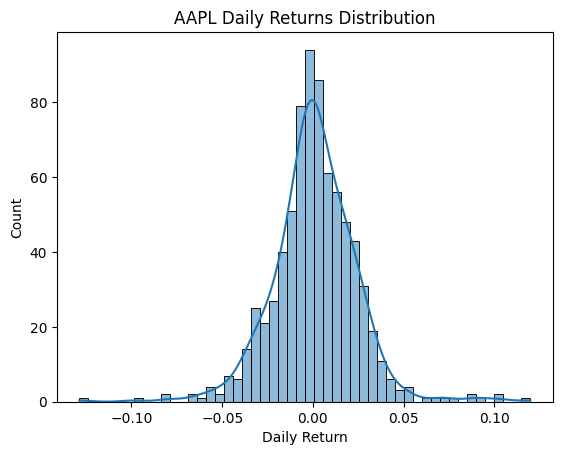

In [6]:
sns.histplot(stock_data['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'{stock_symbol} Daily Returns Distribution')
plt.show()


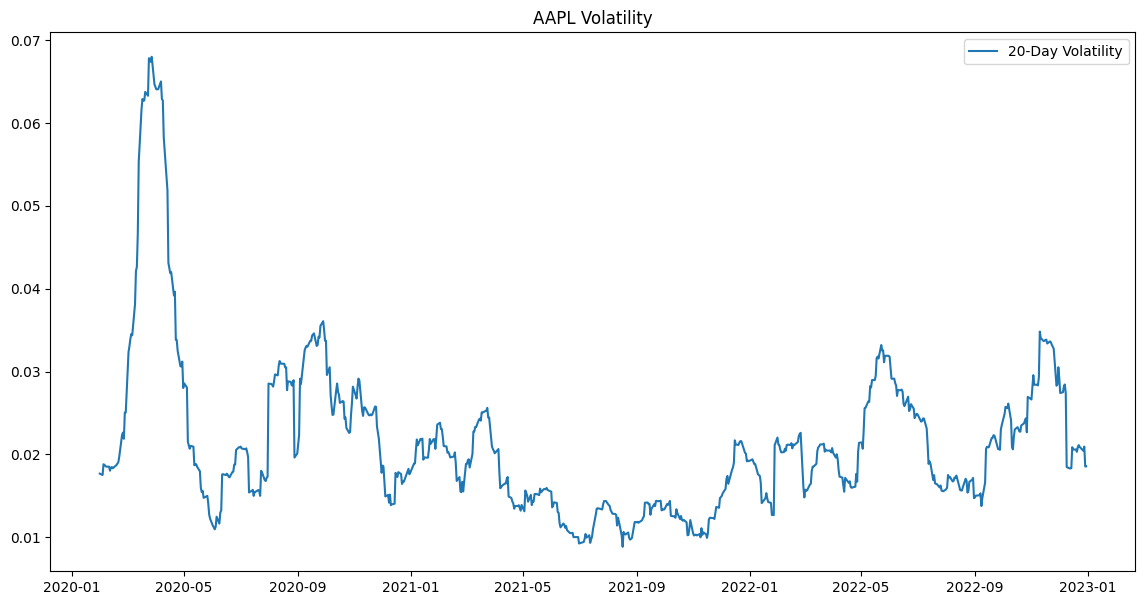

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Volatility'], label='20-Day Volatility')
plt.title(f'{stock_symbol} Volatility')
plt.legend()
plt.show()
